https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("housing.csv")
print(len(df))

20640


In [3]:
pd.read_csv("housing.csv")[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


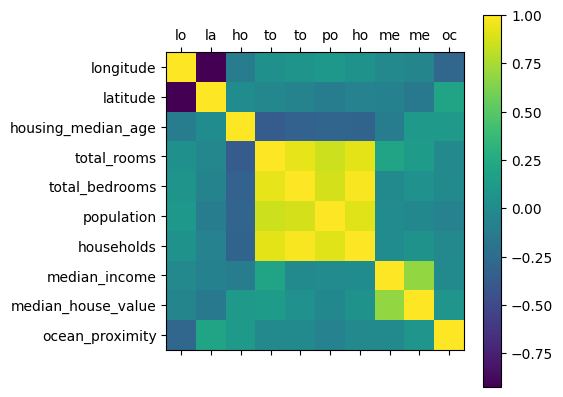

In [8]:
#read data from csv file
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./housing.csv")


df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4})
#check distribution of every feature
stats = {}
for feature in df.columns:
    stats[feature] = df[feature].describe()

with open("./stats.txt", "w") as f:
    f.write(str(stats))

for feature in df.columns:
    plt.hist(df[feature], bins=30, edgecolor='black')
    plt.title(feature)
    plt.savefig(f"./figs/{feature}_distribution.png")
    plt.close()
#quantile transform


#add labels df.columns to x and y axis

plt.matshow(df.corr(method='pearson'))
plt.colorbar()
plt.xticks(range(len(df.columns)),  map(lambda x: x[:2], df.columns))
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [7]:
df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [29]:
df = pd.read_csv("./housing.csv")
df['target']=df['median_house_value']
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4})

In [ ]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values
features = df.drop('target', axis=1)
target = df['target']

# Fill NaN values with mean for each column
features = features.fillna(features.mean())
target = target.fillna(target.mean())

print("\nMissing values after handling:")
print(features.isnull().sum())

In [ ]:
# 1. Pearson Correlation
pearson_corr = pd.Series({
    feature: abs(stats.pearsonr(features[feature], target)[0])
    for feature in features.columns
}).sort_values(ascending=False)

# 2. Spearman Correlation
spearman_corr = pd.Series({
    feature: abs(stats.spearmanr(features[feature], target)[0])
    for feature in features.columns
}).sort_values(ascending=False)

# 3. F-scores
f_scores, _ = f_regression(features, target)
f_scores = pd.Series(f_scores, index=features.columns).sort_values(ascending=False)

# 4. Mutual Information
mi_scores = pd.Series(
    mutual_info_regression(features, target),
    index=features.columns
).sort_values(ascending=False)

# DataFrame with all scores
importance_df = pd.DataFrame({
    'Pearson Correlation': pearson_corr,
    'Spearman Correlation': spearman_corr,
    'F Score': f_scores / np.max(f_scores),  # Normalized F-scores
    'Mutual Information': mi_scores / np.max(mi_scores)  # Normalized MI scores
})

# Detailed results
print("\nDetailed Feature Importance Rankings:")
for method in importance_df.columns:
    print(f"\n{method}:")
    print(importance_df[method].sort_values(ascending=False))

# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = features.join(target).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top features by each method
print("\nTop 3 Most Important Features by Each Method:")
for column in importance_df.columns:
    print(f"\n{column}:")
    print(importance_df[column].nlargest(3))

In [ ]:
df['price'] = df['median_house_value']

# 1. Bivariate Analysis
plt.figure(figsize=(15, 10))

# Price vs Location (Ocean Proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='price', data=df)
plt.xticks(rotation=45)
plt.title('House Prices by Ocean Proximity')
plt.tight_layout()
plt.savefig('figs/price_by_ocean.png')
plt.close()

# Northern vs Southern California (using latitude threshold)
df['region'] = df['latitude'].apply(lambda x: 'Northern' if x > np.median(df['latitude']) else 'Southern')
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='price', data=df)
plt.title('House Prices: Northern vs Southern California')
plt.savefig('figs/price_by_region.png')
plt.close()

# Urban vs Rural (based on population density)
df['population_density'] = df['population'] / df['households']
df['area_type'] = pd.qcut(df['population_density'], q=3, labels=['Rural', 'Suburban', 'Urban'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('House Prices by Area Type')
plt.savefig('figs/price_by_area_type.png')
plt.close()

# 2. Price Determinants
# House size vs price
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_rooms', y='price', data=df, alpha=0.5)
plt.title('Price vs Total Rooms')

plt.subplot(1, 2, 2)
sns.scatterplot(x='total_bedrooms', y='price', data=df, alpha=0.5)
plt.title('Price vs Total Bedrooms')
plt.tight_layout()
plt.savefig('figs/price_vs_size.png')
plt.close()

# Neighborhood characteristics
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='population', y='price', data=df, alpha=0.5)
plt.title('Price vs Population')

plt.subplot(1, 2, 2)
sns.scatterplot(x='households', y='price', data=df, alpha=0.5)
plt.title('Price vs Households')
plt.tight_layout()
plt.savefig('figs/price_vs_neighborhood.png')
plt.close()

# 3. Outlier Analysis
# Create box plots for price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)
plt.title('Price Distribution with Outliers')
plt.savefig('figs/price_outliers.png')
plt.close()

# Geographic distribution of outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df['outlier'] = ((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))).astype(str)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='outlier', data=df, alpha=0.6)
plt.title('Geographic Distribution of Price Outliers')
plt.savefig('figs/outliers_geographic.png')
plt.close()

# 4. Market Segmentation
# Price brackets
plt.figure(figsize=(12, 6))
df['price_bracket'] = pd.qcut(df['price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Luxury'])
sns.countplot(x='price_bracket', data=df)
plt.title('Distribution of Price Brackets')
plt.xticks(rotation=45)
plt.savefig('figs/price_brackets.png')
plt.close()

# Regional market characteristics
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price', hue='price_bracket', data=df)
plt.title('Price Brackets by Region')
plt.xticks(rotation=45)
plt.savefig('figs/regional_markets.png')
plt.close()

# Save summary statistics
summary_stats = df.groupby('price_bracket').agg({
    'price': ['mean', 'std', 'count'],
    'median_income': 'mean',
    'total_rooms': 'mean',
    'population': 'mean'
}).round(2)

summary_stats.to_csv('market_segments_summary.csv')